# Chapter 8: How to analyze the data

In [ ]:
import pandas as pd
import seaborn as sns

## How to melt columns to create long data

In [ ]:
cars = pd.read_pickle('cars.pkl')

In [3]:
cars.head()

,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


In [4]:
cars.shape

(205, 5)

In [5]:
cars_melted = pd.melt(cars, id_vars=['price',"aspiration","carbody"],
                      value_vars=['enginesize','curbweight'],
                      var_name='feature', value_name='featureValue')
cars_melted

,price,aspiration,carbody,feature,featureValue
0,13495.0,std,convertible,enginesize,130
1,16500.0,std,convertible,enginesize,130
2,16500.0,std,hatchback,enginesize,152
3,13950.0,std,sedan,enginesize,109
4,17450.0,std,sedan,enginesize,136
...,...,...,...,...,...
405,16845.0,std,sedan,curbweight,2952
406,19045.0,turbo,sedan,curbweight,3049
407,21485.0,std,sedan,curbweight,3012
408,22470.0,turbo,sedan,curbweight,3217


## How to plot melted columns

In [6]:
cars_melted.query("feature == 'enginesize'")

,price,aspiration,carbody,feature,featureValue
0,13495.0,std,convertible,enginesize,130
1,16500.0,std,convertible,enginesize,130
2,16500.0,std,hatchback,enginesize,152
3,13950.0,std,sedan,enginesize,109
4,17450.0,std,sedan,enginesize,136
...,...,...,...,...,...
200,16845.0,std,sedan,enginesize,141
201,19045.0,turbo,sedan,enginesize,141
202,21485.0,std,sedan,enginesize,173
203,22470.0,turbo,sedan,enginesize,145


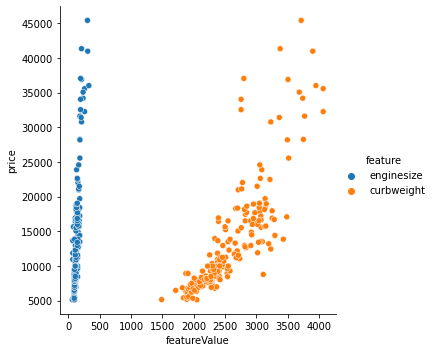

In [7]:
sns.relplot(data=cars_melted.query(feature="enginesize"), hue ="feature", x='featureValue', y='price')

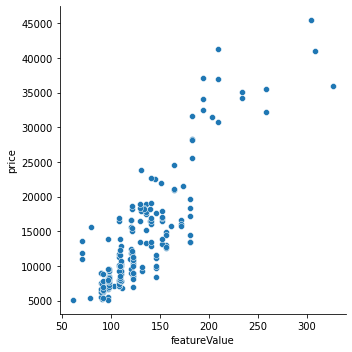

In [8]:
sns.relplot(data=cars_melted.query("feature == 'enginesize'"), x='featureValue', y='price')

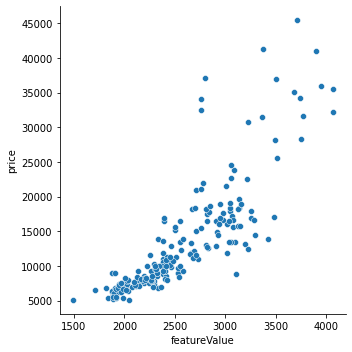

In [9]:
#heteroskedacity
sns.relplot(data=cars_melted.query("feature == 'curbweight'"), x='featureValue', y='price')

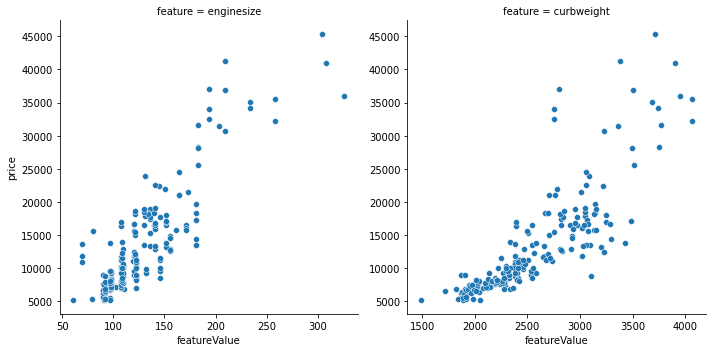

In [10]:
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            col='feature', facet_kws={'sharex':False, 'sharey':False})

## How to group and apply a single aggregate method

In [11]:
# get the data
fires = pd.read_pickle('fires_prepared.pkl')
fires = fires.reset_index(drop=True)

In [12]:
fires.head(3)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
0,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
1,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
2,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0


In [13]:
fires.groupby('state').mean().head(3)

,fire_year,acres_burned,fire_month,days_burning
state,,,,
AK,2004.742504,11367.199362,6.264198,32.081535
AL,2003.885422,42.348169,5.022529,0.272676
AR,2005.850793,50.281673,5.581081,0.400992


In [14]:
fires.groupby(['state','fire_year','fire_month']).max().head(3)

discovery_date contain_date  acres_burned  \
state fire_year fire_month                                             
AK    1992      5              1992-05-31   1992-06-22        1410.0   
                6              1992-06-29   1992-09-17       48087.0   
                7              1992-07-30   1992-09-17       35090.0   

                            days_burning  
state fire_year fire_month                
AK    1992      5                   50.0  
                6                   82.0  
                7                   77.0

## How to work with a DataFrameGroupBy object

In [ ]:
fires.head(3)

In [ ]:
yearly_group = fires.groupby('fire_year')
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

In [ ]:
yearly_group = fires.groupby('fire_year', as_index=False)
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

## How to apply multiple aggregate methods

In [15]:
monthly_group = fires.groupby(['state','fire_year','fire_month'])

In [16]:
monthly_group.agg(['sum','count','mean']).head(3)

acres_burned                    days_burning        \
                                    sum count         mean          sum count   
state fire_year fire_month                                                      
AK    1992      5                4202.0    15   280.133333        135.0    14   
                6               86401.0    26  3323.115385        417.0    25   
                7               48516.7    26  1866.026923        500.0    22   

                                       
                                 mean  
state fire_year fire_month             
AK    1992      5            9.642857  
                6           16.680000  
                7           22.727273

In [17]:
monthly_group.days_burning.agg(['sum','count','mean']).head(3)

sum  count       mean
state fire_year fire_month                         
AK    1992      5           135.0     14   9.642857
                6           417.0     25  16.680000
                7           500.0     22  22.727273

In [18]:
df = monthly_group.agg({'acres_burned':['sum','max','min'],
                   'days_burning':['sum','mean'],
                   'fire_name':'count'})
df.head(3)

acres_burned                days_burning  \
                                    sum      max   min          sum   
state fire_year fire_month                                            
AK    1992      5                4202.0   1410.0  10.0        135.0   
                6               86401.0  48087.0  10.0        417.0   
                7               48516.7  35090.0  10.0        500.0   

                                      fire_name  
                                 mean     count  
state fire_year fire_month                       
AK    1992      5            9.642857        14  
                6           16.680000        23  
                7           22.727273        26

## How to use the pivot() method

In [19]:
states = ['AK','CA','ID','TX']
top_states = fires.groupby(['state','fire_year'], as_index=False).sum()
top_states = top_states.query('state in @states')
top_states.head(2)
top_states.pivot(index='fire_year', columns='state', values='acres_burned').head(2)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5


<AxesSubplot:xlabel='fire_year'>

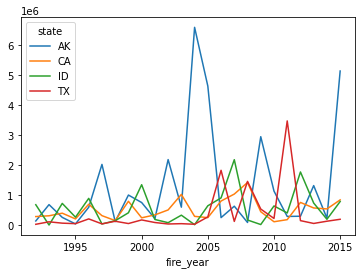

In [20]:
top_states.pivot(index='fire_year', columns='state', values='acres_burned').plot()

## How to use the pivot_table() method

In [21]:
states = ['AK','CA','ID','TX']
# top_states = fires.groupby(['state','fire_year'], as_index=False).sum()
# top_states = top_states.query('state in @states')
# top_states.pivot(index='fire_year', columns='state', values='acres_burned').head(2)
fires_top_4 = fires.query('state in @states')
fires_top_4 = fires_top_4.pivot_table(index='fire_year', columns='state', 
                                      values='acres_burned', aggfunc='sum')
fires_top_4.head(2)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5


<AxesSubplot:xlabel='fire_year'>

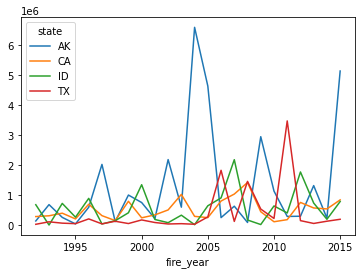

In [22]:
fires_top_4.plot()

## How to create bins of equal size

In [23]:
fires_filtered = fires.query('fire_year == 2010 and days_burning > 0').dropna()
fires_filtered.head(5)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
173229,Fourmile Trail,2010,AK,2010-04-28,2010-05-05,16.8,4,7.0
173230,Granite Tors,2010,AK,2010-05-27,2010-08-11,7880.0,5,76.0
173231,Goldbug Creek,2010,AK,2010-06-23,2010-06-28,2777.0,6,5.0
173232,Broken Tree,2010,AK,2010-05-24,2010-07-08,112.0,5,45.0
173233,Folger Creek,2010,AK,2010-07-01,2010-07-16,90.0,7,15.0


<AxesSubplot:>

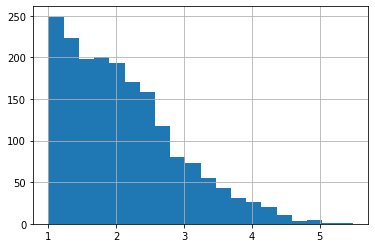

In [26]:
import numpy as np
fires_filtered["acres_burned_log"]= np.log10(fires_filtered["acres_burned"])
fires_filtered.acres_burned_log.hist(bins=20)

In [28]:
fires_filtered.acres_burned.describe()

count      1858.000000
mean       1457.154413
std        9795.234140
min          10.000000
25%          27.000000
50%          91.000000
75%         371.000000
max      306113.000000
Name: acres_burned, dtype: float64

In [27]:
pd.cut(fires_filtered.acres_burned, bins=4)

173229    (-296.103, 76535.75]
173230    (-296.103, 76535.75]
173231    (-296.103, 76535.75]
173232    (-296.103, 76535.75]
173233    (-296.103, 76535.75]
                  ...         
273969    (-296.103, 76535.75]
274046    (-296.103, 76535.75]
274049    (-296.103, 76535.75]
274081    (-296.103, 76535.75]
274116    (-296.103, 76535.75]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[float64]): [(-296.103, 76535.75] < (76535.75, 153061.5] < (153061.5, 229587.25] < (229587.25, 306113.0]]

In [29]:
# equal ranges of values in each cut
fires_filtered["acres_burned_even_bin4"]=pd.cut(fires_filtered.acres_burned, bins=4)
fires_filtered.acres_burned_even_bin4.value_counts()

(-296.103, 76535.75]     1853
(76535.75, 153061.5]        3
(153061.5, 229587.25]       1
(229587.25, 306113.0]       1
Name: acres_burned_even_bin4, dtype: int64

In [30]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000])

173229    (0, 100000]
173230    (0, 100000]
173231    (0, 100000]
173232    (0, 100000]
173233    (0, 100000]
             ...     
273969    (0, 100000]
274046    (0, 100000]
274049    (0, 100000]
274081    (0, 100000]
274116    (0, 100000]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[int64]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000]]

In [31]:
fires_filtered["acres_burned_bin"]=pd.cut(fires_filtered.acres_burned, bins=[0,35,200,3000],
       labels=['01 small','02 medium','03 large'])
fires_filtered = fires_filtered.sort_values(by="acres_burned_bin",ascending=True)
fires_filtered.acres_burned_bin.value_counts(normalize=True)

02 medium    0.380510
01 small     0.323666
03 large     0.295824
Name: acres_burned_bin, dtype: float64

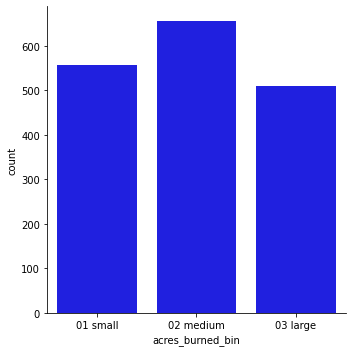

In [35]:
#colors = ['red','blue','black','orange']
colors = ['blue']
sns.set_palette(sns.color_palette(colors))
sns.catplot(data=fires_filtered, x="acres_burned_bin", kind= "count", color="blue")

In [37]:
pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large']).value_counts()

small         1855
medium           2
very large       1
large            0
Name: acres_burned, dtype: int64

In [36]:
fires_filtered.acres_burned.median()

91.0

In [42]:
fires_filtered.acres_burned.quantile(0.50)

91.0

In [45]:
#len(fires_filtered) *0.3 
#557.4
len(fires_filtered.query("acres_burned <= 35.010000000000005"))

558

In [38]:
fires_filtered.acres_burned.quantile(0.30)

35.010000000000005

In [39]:
fires_filtered.acres_burned.quantile(0.70)

276.7999999999997

In [40]:
pd.cut(fires_filtered.acres_burned, bins=[0,34,270,3000],
       labels=['small','medium','large']).value_counts(normalize=True)

medium    0.433295
small     0.316125
large     0.250580
Name: acres_burned, dtype: float64

In [41]:
pd.cut(fires_filtered.acres_burned, bins=200).value_counts()

(-296.103, 1540.515]       1646
(1540.515, 3071.03]          79
(3071.03, 4601.545]          34
(4601.545, 6132.06]          18
(6132.06, 7662.575]          12
                           ... 
(131634.29, 133164.805]       0
(133164.805, 134695.32]       0
(134695.32, 136225.835]       0
(136225.835, 137756.35]       0
(153061.5, 154592.015]        0
Name: acres_burned, Length: 200, dtype: int64

## How to create bins with equal numbers of unique items

In [46]:
# equal number of values in cut
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large'])

173229         small
183270         small
183271         small
183272         small
197484         small
             ...    
226438    very large
226440    very large
226444    very large
226473    very large
226478    very large
Name: acres_burned, Length: 1858, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [47]:
pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large']).value_counts()

small         466
medium        465
very large    464
large         463
Name: acres_burned, dtype: int64

In [48]:
fires_filtered["acres_burned_qcut4"]=pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large'])
fires_filtered.groupby("acres_burned_qcut4")["acres_burned"].agg("max")

acres_burned_qcut4
small             27.0
medium            91.0
large            371.0
very large    306113.0
Name: acres_burned, dtype: float64

In [51]:
fires_filtered['fire_size'] = pd.qcut(fires_filtered.acres_burned, q=4,
    labels=['small','medium','large','very large'])

In [49]:
pd.qcut(fires_filtered.days_burning, q=4,
        labels=['short','medium','long'], duplicates='drop').value_counts()

short     1018
long       433
medium     407
Name: days_burning, dtype: int64

## How to plot the binned data

In [ ]:
fires_filtered.head()

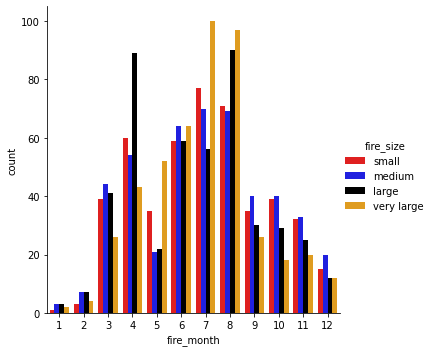

In [53]:
colors = ['red','blue','black','orange']
sns.set_palette(sns.color_palette(colors))
sns.catplot(data=fires_filtered, kind='count', x='fire_month', hue='fire_size')

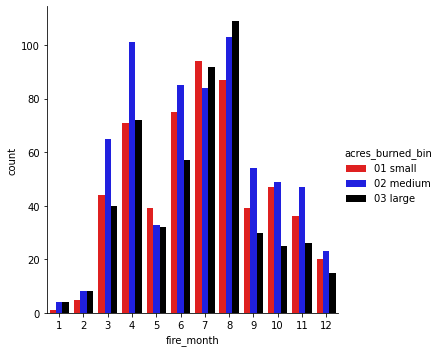

In [54]:
sns.catplot(data=fires_filtered, kind='count', x='fire_month', hue='acres_burned_bin')

## How to get the top n rows

In [55]:
cars.nlargest(n=6, columns='enginesize')

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
47,std,sedan,258,4066,32250.0
48,std,sedan,258,4066,35550.0
71,std,sedan,234,3740,34184.0


In [56]:
cars.nlargest(n=6, columns=['enginesize','price'])

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
48,std,sedan,258,4066,35550.0
47,std,sedan,258,4066,32250.0
72,std,convertible,234,3685,35056.0


## How to calculate percent change

In [57]:
df = fires[['state','fire_year','acres_burned']] \
    .groupby(['state','fire_year']).sum()
df.head()

acres_burned
state fire_year              
AK    1992           142444.7
      1993           686630.5
      1994           261604.7
      1995            43762.6
      1996           598407.2

In [58]:
df.pct_change()

acres_burned
state fire_year              
AK    1992                NaN
      1993           3.820330
      1994          -0.619002
      1995          -0.832715
      1996          12.673941
...                       ...
WY    2011           0.552941
      2012           2.582104
      2013          -0.888021
      2014          -0.866764
      2015           4.046849

[1148 rows x 1 columns]

## How to rank rows

In [59]:
df = fires.groupby('state').sum() \
    [['acres_burned','fire_year','days_burning']]
df.head(3)

,acres_burned,fire_year,days_burning
state,,,
AK,3.222601e+07,5683445,80268.0
AL,8.101628e+05,38336332,2886.0
AR,4.502221e+05,17960388,1132.0


In [61]:
df.acres_burned.rank?

Signature:
df.acres_burned.rank(
    axis=0,
    method: 'str' = 'average',
    numeric_only: 'Optional[bool_t]' = None,
    na_option: 'str' = 'keep',
    ascending: 'bool_t' = True,
    pct: 'bool_t' = False,
) -> 'FrameOrSeries'
Docstring:
Compute numerical data ranks (1 through n) along axis.

By default, equal values are assigned a rank that is the average of the
ranks of those values.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Index to direct ranking.
method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
    How to rank the group of records that have the same value (i.e. ties):

    * average: average rank of the group
    * min: lowest rank in the group
    * max: highest rank in the group
    * first: ranks assigned in order they appear in the array
    * dense: like 'min', but rank always increases by 1 between groups.

numeric_only : bool, optional
    For DataFrame objects, rank only numeric columns if set to True.
na_option

In [60]:
df['acres_rank'] = df.acres_burned.rank(ascending=False)
df.head(3)

,acres_burned,fire_year,days_burning,acres_rank
state,,,,
AK,3.222601e+07,5683445,80268.0,1.0
AL,8.101628e+05,38336332,2886.0,23.0
AR,4.502221e+05,17960388,1132.0,27.0


In [62]:
df['days_rank'] = df.days_burning.rank(method='max')
df.sort_values('days_burning').head(4)

,acres_burned,fire_year,days_burning,acres_rank,days_rank
state,,,,,
RI,147.45,22092,0.0,51.0,1.0
VT,985.70,46240,6.0,50.0,3.0
CT,7358.20,364159,6.0,46.0,3.0
NH,1232.23,82240,9.0,49.0,4.0
